In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [72]:
trait_date_df = pd.read_csv(f"TraitDate.csv")

# trait_date_df.info()

In [73]:
# Fix column names
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("- ", "_")
    )

    return df

trait_date_df = clean_column_names(trait_date_df)

# trait_date_df.info()

In [74]:
# One ad_set_name contains TraitDate PreDev - SP and another contains TraitDate PreDev - SC. I want to group by ad_set_name and then by date.
trait_date_ad = trait_date_df.groupby(['ad_set_name']).sum().reset_index().drop(columns=['gender', 'age', 'result_type'])
trait_date_gender = trait_date_df.groupby(['gender']).sum().reset_index().drop(columns=['ad_set_name', 'age', 'result_type'])
trait_date_age = trait_date_df.groupby(['age']).sum().reset_index().drop(columns=['ad_set_name', 'gender', 'result_type'])

trait_date_ad

,ad_set_name,results,amount_spent_(inr),reach,link_clicks,cpc_(cost_per_link_click),ctr_(all),"cpm_(cost_per_1,000_impressions)",reporting_starts,reporting_ends
0,TraitDate PreDev - SC,347.0,711.78,21752,347.0,25.516865,24.934292,582.025677,2025-04-012025-04-012025-04-012025-04-012025-0...,2025-04-292025-04-292025-04-292025-04-292025-0...
1,TraitDate PreDev - SP,498.0,674.01,8938,498.0,15.316634,69.853551,801.098247,2025-04-012025-04-012025-04-012025-04-012025-0...,2025-04-292025-04-292025-04-292025-04-292025-0...


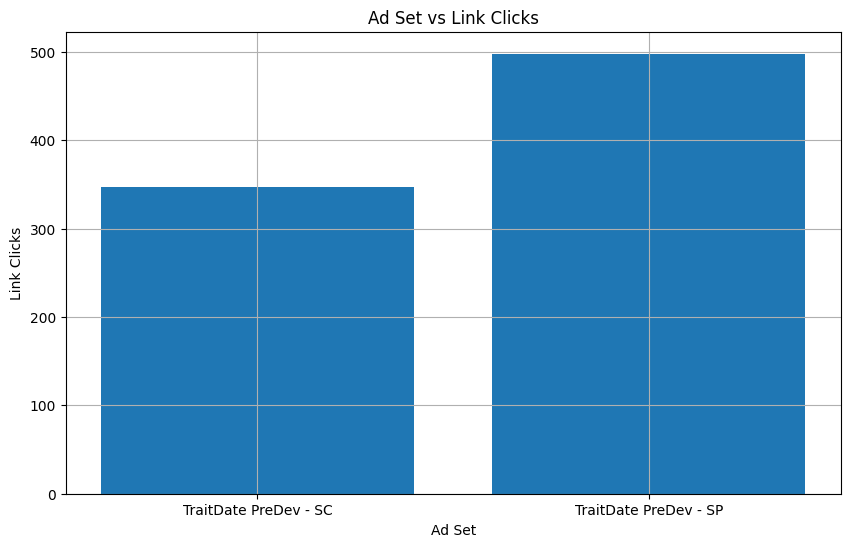

In [75]:
# Plotting the Graphs
# 1. ad & link_clicks
plt.figure(figsize=(10, 6))
plt.bar(trait_date_ad["ad_set_name"], trait_date_ad["link_clicks"])
plt.title("Ad Set vs Link Clicks")
plt.xlabel("Ad Set")
plt.ylabel("Link Clicks")
plt.savefig("ad_set_vs_link_clicks.png")
plt.grid()

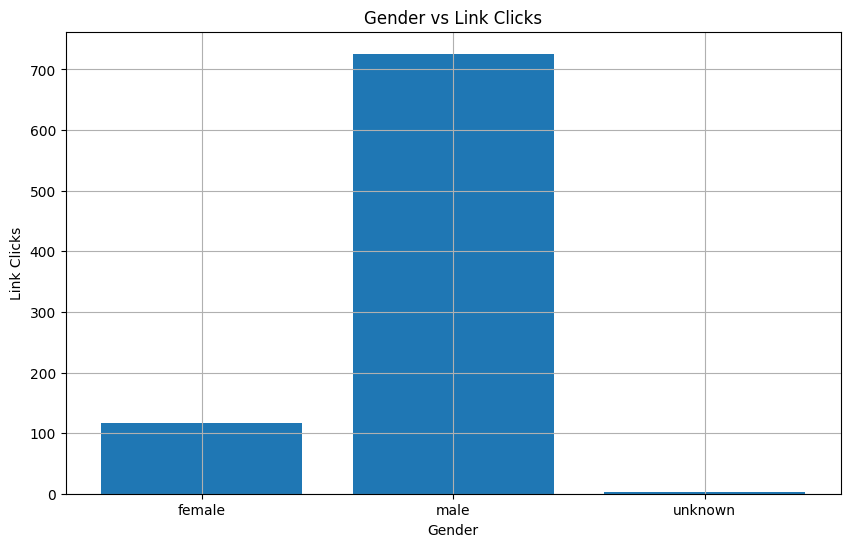

In [76]:
# 2. gender & link_clicks
plt.figure(figsize=(10, 6))
plt.bar(trait_date_gender["gender"], trait_date_gender["link_clicks"])
plt.title("Gender vs Link Clicks")
plt.xlabel("Gender")
plt.ylabel("Link Clicks")
plt.savefig('gender_vs_link_clicks.png')
plt.grid()

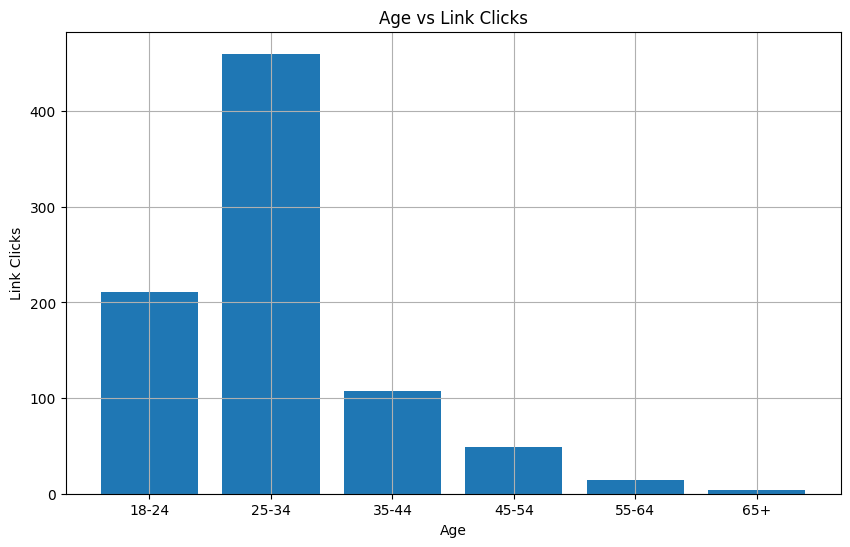

In [77]:
# 3. age & link_clicks
plt.figure(figsize=(10, 6))
plt.bar(trait_date_age["age"], trait_date_age["link_clicks"])
plt.title("Age vs Link Clicks")
plt.xlabel("Age")
plt.ylabel("Link Clicks")
plt.savefig('age_vs_link_clicks.png')
plt.grid()

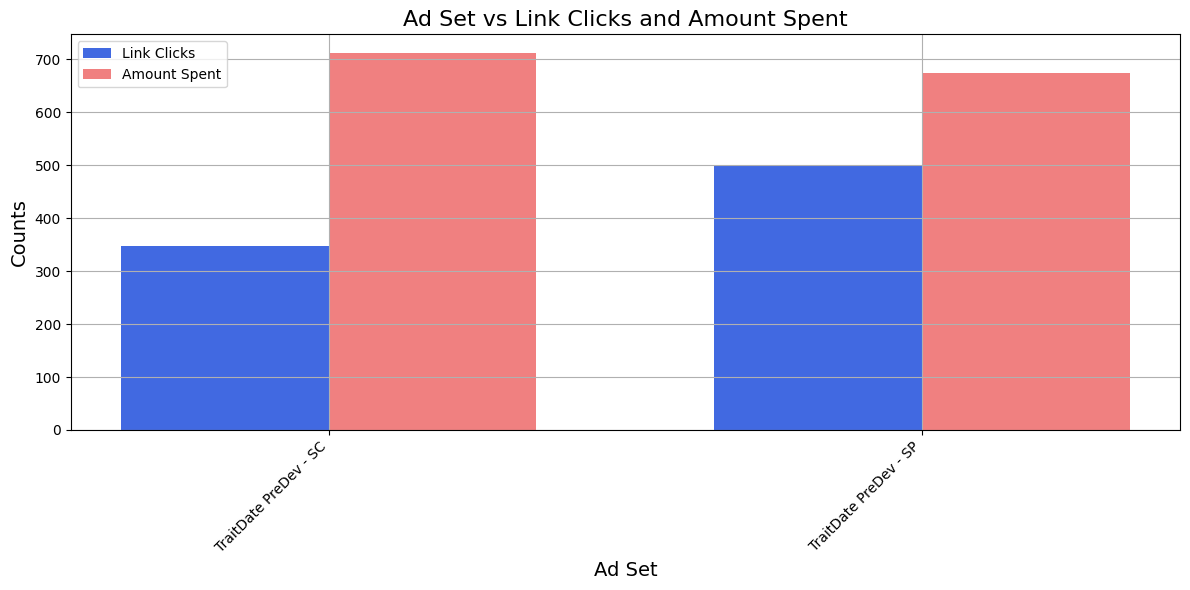

In [78]:
# 4. amount spent & link_clicks for each ad
# Set up
x = np.arange(len(trait_date_ad["ad_set_name"]))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# First bar: Link Clicks
rects1 = ax.bar(x - width/2, trait_date_ad["link_clicks"], width, label='Link Clicks', color='royalblue')

# Second bar: Reach
rects2 = ax.bar(x + width/2, trait_date_ad["amount_spent_(inr)"], width, label='Amount Spent', color='lightcoral')

# Titles and labels
ax.set_xlabel('Ad Set', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Ad Set vs Link Clicks and Amount Spent', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(trait_date_ad["ad_set_name"], rotation=45, ha='right')
ax.legend()
ax.grid(True)

fig.tight_layout()
plt.savefig('ad_set_vs_link_clicks_and_amount_spent.png')
plt.show()

/var/folders/77/4v4826r95v3dmc8hb5s9h9th0000gn/T/ipykernel_21326/1064601279.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(trait_date_ad["ad_set_name"], rotation=45, ha='right')


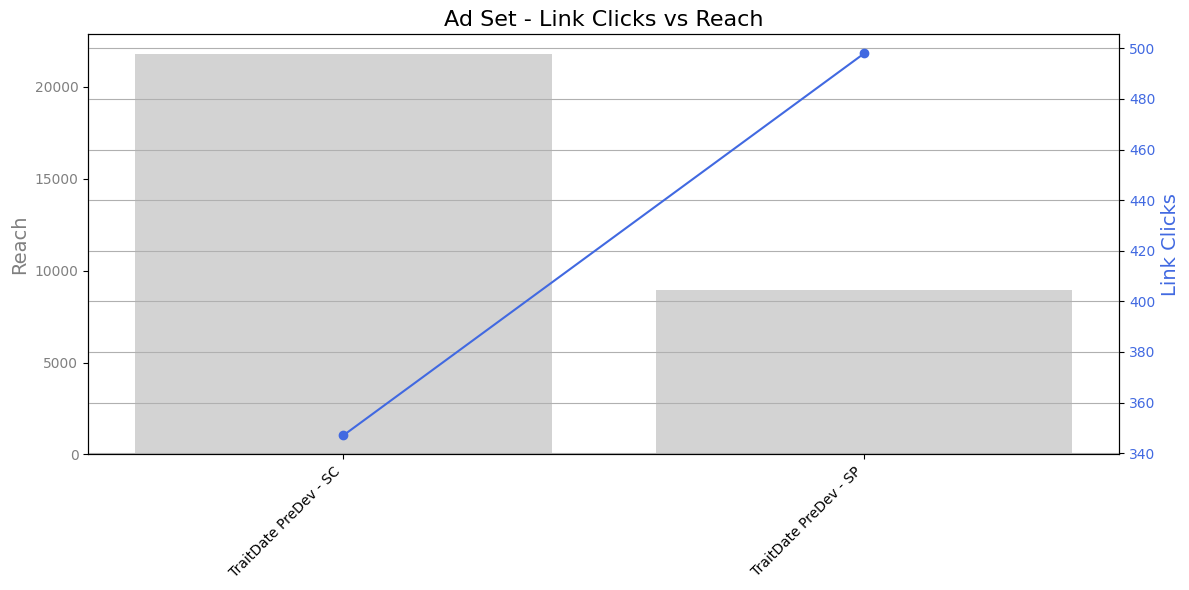

In [79]:
# Link Clicks vs Reach
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for Reach
ax1.bar(trait_date_ad["ad_set_name"], trait_date_ad["reach"], color='lightgray', label="Reach")
ax1.set_ylabel('Reach', fontsize=14, color='gray')
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_xticklabels(trait_date_ad["ad_set_name"], rotation=45, ha='right')

# Line for Link Clicks
ax2 = ax1.twinx()
ax2.plot(trait_date_ad["ad_set_name"], trait_date_ad["link_clicks"], color='royalblue', marker='o', label="Link Clicks")
ax2.set_ylabel('Link Clicks', fontsize=14, color='royalblue')
ax2.tick_params(axis='y', labelcolor='royalblue')

plt.title('Ad Set - Link Clicks vs Reach', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig('ad_set_vs_link_clicks_and_reach.png')
plt.show()

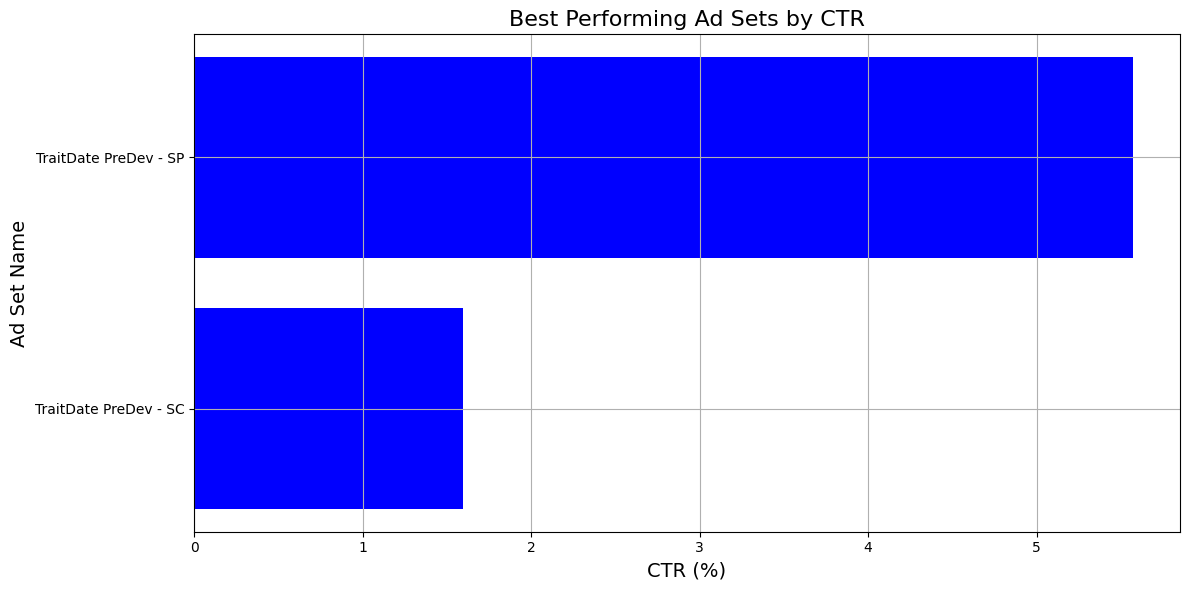

In [80]:
trait_date_ad['ctr (%)'] = (trait_date_ad['link_clicks'] / trait_date_ad['reach']) * 100

best_ads = trait_date_ad.sort_values(by='ctr (%)', ascending=False)

# Best Ad
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(best_ads['ad_set_name'], best_ads['ctr (%)'], color='blue')
plt.xlabel('CTR (%)', fontsize=14)
plt.ylabel('Ad Set Name', fontsize=14)
plt.title('Best Performing Ad Sets by CTR', fontsize=16)
plt.gca().invert_yaxis()  # Highest CTR on top
plt.grid(True)
plt.tight_layout()
plt.savefig('best_performing_ad_sets_by_ctr.png')
plt.show()